In [1]:
import pickle

In [2]:
import cv2  #image size changing
import numpy as np #array ke saath khelna
import os   #directories mai  yaha vaha
from random import shuffle  #shuffle the dataset
from tqdm import tqdm #for proffesional looping with a progress bar
import matplotlib.pyplot as plt

TRAIN_DIR ="C:/Users/aksha/Desktop/train"
TEST_DIR = "C:/Users/aksha/Desktop/test"
IMG_SIZE=100
LR= 1e-3    #0.001

MODEL_NAME = 'DOGvsCAT--()--().model'.format(LR,'2conv-basic')

In [3]:
def label_img(img):
    word_label = img.split('.')[-3] #6 box 
    if word_label=="cat" : return 0    # cat cha label 0
    elif word_label == "dog" : return 1 # dog cha label 1

In [4]:
img="cat.1.jpg"  
print(img.split('.')[0])

cat


In [5]:
TRAIN_DIR ="C:/Users/aksha/Desktop/train"
img="cat.1.jpg"
path = os.path.join(TRAIN_DIR,img)
print(path)

C:/Users/aksha/Desktop/train\cat.1.jpg


In [8]:
training_data=[]

In [10]:

def create_train_data():
    
    for img in tqdm(os.listdir(TRAIN_DIR)):
        label= label_img(img)   #LABEL  DALA DOG CAT KA
        path = os.path.join(TRAIN_DIR,img)  #path mai pura aagaya of every img
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)  #IMAGE KO GRAY KIYA CAUSE 3 COLOR R,G,B JYAADA PROCESSING LETA  
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))     #IMAGE RESIZE kIYA (EK  STANDARD FORMAT SABKA)
        training_data.append([np.array(img),np.array(label)]) #(TRAINING DATA NAAM KI li MAI RAKH DIYA PAIR OF IMGAGE LABEL)
    shuffle(training_data) #EK HI LINE MAI SAB DOG YA SAB CAT NA AAYE SO  SHUFFLE MAARA
    np.save('train_data.npy',training_data) #BAAR BAAR THODI TIMEPASS KARNA HAI SO PROCESSED TRAINING DATA KO STORE KIYA
    return training_data
trained_no=create_train_data()        

100%|████████████████████████████████████████████████████████████████████████████| 25000/25000 [06:14<00:00, 66.68it/s]
C:\Users\aksha\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


0


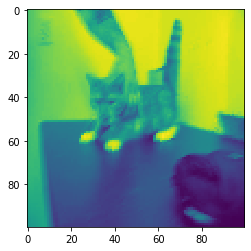

0


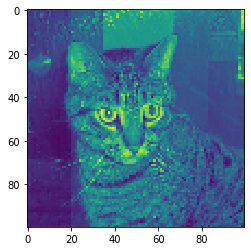

0


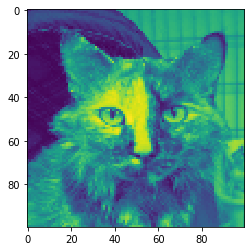

In [11]:
#EK IMAGE EXAMPLE DEKH LETE HAI KAISA DIKHTA HAI GRAY SCALE MAI
for i  in range(3):
    img=os.listdir(TRAIN_DIR)[i]  #IMG KE FOLDER SE PEHLA IMAGE UTHAYA
    print(label_img(img)) #LABEL N=BHI DEKH LETE HAI
    path = os.path.join(TRAIN_DIR,img)  #path mai pura aagaya of  img
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) #image gry dekhna tha na
    img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
    plt.imshow(img) 
    plt.show()


In [12]:
#kitne images hai apne pass
print(len(training_data))

25000


In [13]:
#ek bbar check  maar lete hai.. line se saare dog ya cat to nahi aaye na.. 
#confirm karte ai  shuffle hua ki nahi
for sample in training_data[:10]:
    print(sample[1])

1
1
1
1
0
1
1
0
0
1


In [14]:
X = []  #X mai images ko lete hai (features)
y = [] #y mai labels 

In [15]:
for features,labels in training_data:
    X.append(features)
    y.append(labels)
X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)
#X mai n images and har image ka dimension (img_size,img_size,1) , last mai  one cause grayescale kiya bhai

In [16]:
#pickle naam ka kadak module hai bhai
# saala save karlene ka X and y ...
#ek baaar ye preprocessing ache se karo fir ye file kholo hi mat...
#fir jab cnn model banao ek nayi file mai karo .. ye pickle ko vaha load kar lena
pickle_out=open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out=open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [17]:
#aise karte hai pickle file ko load
pickle_in=open("X.pickle","rb")
X=pickle.load(pickle_in)

In [18]:
X[1]

array([[[ 52],
        [ 59],
        [ 41],
        ...,
        [ 73],
        [ 82],
        [ 77]],

       [[ 62],
        [ 48],
        [ 42],
        ...,
        [ 89],
        [ 80],
        [ 87]],

       [[ 45],
        [ 40],
        [ 42],
        ...,
        [ 99],
        [ 84],
        [ 97]],

       ...,

       [[190],
        [197],
        [203],
        ...,
        [ 70],
        [ 63],
        [ 64]],

       [[208],
        [212],
        [200],
        ...,
        [ 69],
        [ 64],
        [ 62]],

       [[207],
        [203],
        [217],
        ...,
        [ 63],
        [ 66],
        [ 63]]], dtype=uint8)

In [19]:
#we are done with pre processing

In [20]:
array =[['dog',1], ['cat',7],['aks',2] ]
for mdh, ls in array:
    print(mdh)

dog
cat
aks
